In [1]:
from __future__ import print_function

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import LearningRateScheduler as LRS
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Reshape
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.layers.normalization import BatchNormalization as BN
from keras.layers import GaussianNoise as GN
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
batch_size = 100
epochs = 200
num_classes=10

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('training set', x_train.shape)
print('test set', x_test.shape)

x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize [0..255]-->[0..1]
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False)

training set (60000, 28, 28)
test set (10000, 28, 28)


In [4]:
model = Sequential()
model.add(Reshape(target_shape=(784,), input_shape=(28,28,1)))
model.add(GN(0.3))

model.add(Dense(512))
model.add(BN())
model.add(GN(0.3))
model.add(Activation('relu'))

model.add(Dense(512))
model.add(BN())
model.add(GN(0.3))
model.add(Activation('relu'))

model.add(Dense(512))
model.add(BN())
model.add(GN(0.3))
model.add(Activation('relu'))

model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 784)               0         
_________________________________________________________________
gaussian_noise_1 (GaussianNo (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
gaussian_noise_2 (GaussianNo (None, 512)               0         
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
__________

In [ ]:
sgd=SGD(lr=0.1, decay=0.0, momentum=0.5)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, cooldown=1,
                              patience=10, min_lr=0.005)


model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

history=model.fit_generator(datagen.flow(x_train, y_train,batch_size=batch_size),
                            steps_per_epoch=len(x_train) / batch_size, 
                            epochs=epochs,
                            validation_data=(x_test, y_test),
                            callbacks=[reduce_lr],
                            verbose=1)


score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/200
600/600 [==============================] - 8s 13ms/step - loss: 0.6268 - acc: 0.7937 - val_loss: 0.1296 - val_acc: 0.9583
Epoch 2/200
600/600 [==============================] - 7s 11ms/step - loss: 0.3466 - acc: 0.8879 - val_loss: 0.0928 - val_acc: 0.9699
Epoch 3/200
600/600 [==============================] - 7s 11ms/step - loss: 0.2882 - acc: 0.9082 - val_loss: 0.0834 - val_acc: 0.9709
Epoch 4/200
600/600 [==============================] - 7s 11ms/step - loss: 0.2567 - acc: 0.9165 - val_loss: 0.0729 - val_acc: 0.9756
Epoch 5/200
600/600 [==============================] - 7s 11ms/step - loss: 0.2356 - acc: 0.9240 - val_loss: 0.0596 - val_acc: 0.9796
Epoch 6/200
600/600 [==============================] - 7s 11ms/step - loss: 0.2171 - acc: 0.9299 - val_loss: 0.0606 - val_acc: 0.9788
Epoch 7/200
600/600 [==============================] - 7s 11ms/step - loss: 0.2102 - acc: 0.9335 - val_loss: 0.0558 - val_acc: 0.9795
Epoch 8/200
600/600 [==============================] - 7s 11ms

Test loss: 0.018846970729831082
Test accuracy: 0.994


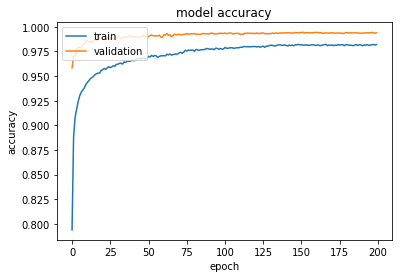

In [7]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('gila.png')
plt.show()

In [10]:
from keras.models import load_model

model.save('9942.h5')

In [11]:
modelprueba = load_model('9942.h5')

In [12]:
score = modelprueba.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.018083039452321464
Test accuracy: 0.9942
